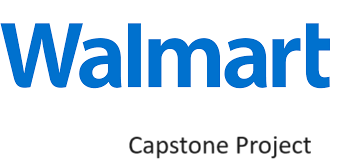

#  <font color ='Green'>🛒Walmart-Capstone Project🛒 </font>

## Table of Contents

### 💠Problem Statement
### 💠Project Objective
### 💠Data Description
### 💠Data Pre-processing Steps 
### 💠Analysing the DataFrame
### 💠Choosing the Algorithm for the Project
### 💠Model Evaluation and Techniques
### 💠Predictions of 12 weeks of each store: Using RandomForest
### 💠Predictions of 12 weeks of each store: Using SARIMAX
### 💠Inferences
### 💠Future Possibilities of the Project
### 💠Conclusion
### 💠References


## [💠Problem Statement 💠]

### <font color ='Grey'>🛒 A retail store that has multiple outlets across the country are facing issues in managing the inventory - to match the demand with respect to supply.</font>  
### -----------------------------------------------------------------------------------------------------------------------------------------------------------

## [💠Project Objective💠]

### <font color ='Grey'>🛒 To come up with useful insights using the data and make prediction models to forecast the sales for 12 number of weeks.</font>  
### -----------------------------------------------------------------------------------------------------------------------------------------------------------

## [💠Data Description💠]

### <font color ='Grey'>▶The walmart.csv contains 6435 rows and 8 columns.</font>  

### <font color ='Grey'>▶Feature Name Description</font>  

    ►Store         Store number  
    ►Date          Week of Sales
    ►Weekly_Sales  Sales for the given store in that week
    ►Holiday_Flag  If it is a holiday week
    ►Temperature   Temperature on the day of the sale
    ►Fuel_Price    Cost of the fuel in the region
    ►CPI Consumer  Price Index
    ►Unemployment  Unemployment Rate
### -----------------------------------------------------------------------------------------------------------------------------------------------------------

## [💠Data Pre-processing Steps💠]

### <font color ='Grey'>▶Checking Shape and rows of Data Frame  </font> 
### <font color ='Grey'>▶Checking Dtype of columns </font> 
### <font color ='Grey'>▶Checking for NULL values </font> 
### <font color ='Grey'>▶Checking for Duplicate records </font> 
### <font color ='Grey'>▶Correcting Dtype of columns and creating necessary columns </font>
### -----------------------------------------------------------------------------------------------------------------------------------------------------------

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Walmart.csv')
print('________________________________________________________________________________')
print('**** Sahpe of dataframe ',df.shape,' ****')
print('________________________________________________________________________________')
df.head()

________________________________________________________________________________
**** Sahpe of dataframe  (6435, 8)  ****
________________________________________________________________________________


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [5]:
print('________________________________________________________________________________')
print(f'Number of duplicate records in the dataframe {df.duplicated().sum()}')
print('________________________________________________________________________________')


________________________________________________________________________________
Number of duplicate records in the dataframe 0
________________________________________________________________________________


In [6]:
df['Date']=pd.to_datetime(df['Date'])

df['year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Week']=df['Date'].dt.week

df.head()

C:\Users\MAYUR\AppData\Local\Temp\ipykernel_18800\234875604.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date']=pd.to_datetime(df['Date'])
C:\Users\MAYUR\AppData\Local\Temp\ipykernel_18800\234875604.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['Week']=df['Date'].dt.week


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,Month,Week
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,17
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,48
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,8
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,18


## [💠Analysing the DataFrame💠][EDA]

### <font color ='Grey'>▶Average Weekly_Sales analysis  </font> 
### <font color ='Grey'>▶Top N best and worst performing stores  </font> 
### <font color ='Grey'>▶Trend analysis of stores based on months </font> 
### <font color ='Grey'>▶The effect of Unemployment on Weekly_Sales  </font> 
### <font color ='Grey'>▶Effect of Temperature on Weekly_sales  </font> 
### <font color ='Grey'>▶Effect of Consumer Price index affecting the weekly sales  </font> 
### <font color ='Grey'>▶Effect of Holiday_Flag on Weekly_Sales  </font> 
### <font color ='Grey'>▶Effect of Fuel_Price on Weekly_Sales </font> 
### -----------------------------------------------------------------------------------------------------------------------------------------------------------

## 💠Average Weekly_Sales analysis

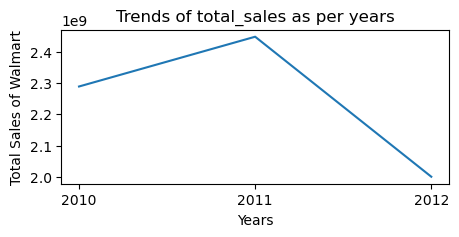

In [7]:
Year=df.groupby('year')['Weekly_Sales'].sum()

plt.figure(figsize=(5,2))
plt.plot([str(x) for x in Year.index],Year)
plt.title('Trends of total_sales as per years')
plt.ylabel('Total Sales of Walmart')
plt.xlabel('Years')
plt.show()

del Year

_____________________________________________________________________________________________________________________
*** Stores with sales below average sales are  [3, 5, 7, 8, 9, 12, 15, 16, 17, 21, 22, 25, 26, 29, 30, 33, 34, 35, 36, 37, 38, 40, 42, 43, 44, 45]
*** Stores with sales above average sales are  [1, 2, 4, 6, 10, 11, 13, 14, 18, 19, 20, 23, 24, 27, 28, 31, 32, 39, 41]
_____________________________________________________________________________________________________________________


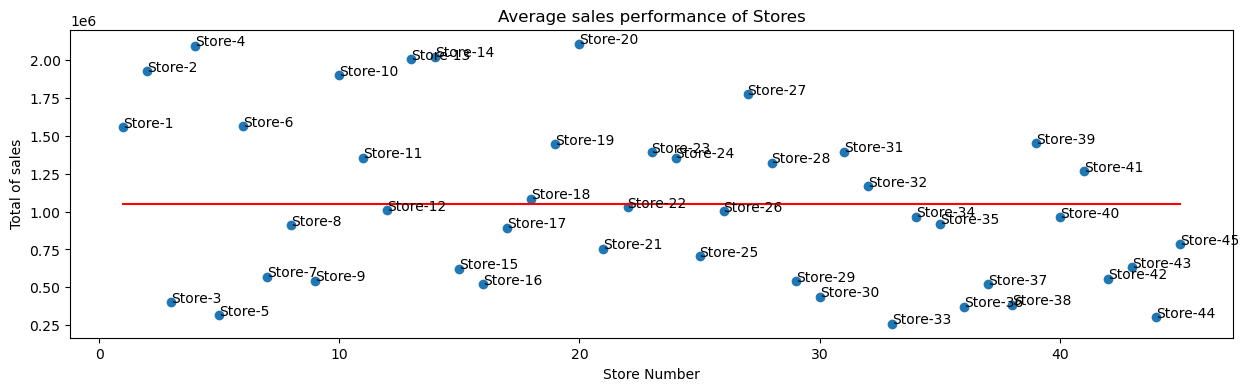

In [8]:
Avg_sales=pd.DataFrame(df.groupby('Store')['Weekly_Sales'].mean())
Avg_sales['AVG']=Avg_sales.mean()[0]

Store=['Store-'+str(i) for i in range(1,46)]
x=list(Avg_sales.index)
y=list(Avg_sales['Weekly_Sales'])

Above_avg=[i+1 for i in range(0,45) if y[i]>=Avg_sales['AVG'][1]]
Below_avg=[i+1 for i in range(0,45) if y[i]<Avg_sales['AVG'][1]]

print('_____________________________________________________________________________________________________________________')
print('*** Stores with sales below average sales are ',Below_avg)
print('*** Stores with sales above average sales are ',Above_avg)
print('_____________________________________________________________________________________________________________________')


plt.figure(figsize=(15,4))
plt.scatter(x,y)

for i,t in enumerate(Store):
    plt.annotate(t,(x[i],y[i]))
    
plt.plot(x,Avg_sales['AVG'],color='red')
plt.annotate('Average sales =',(0,Avg_sales['AVG'][1]+1800000),fontsize=12,color='Red')   
plt.annotate(int(Avg_sales['AVG'][1]),(1,Avg_sales['AVG'][1]-19000000),fontsize=12,color='Red')  

plt.xlabel('Store Number')
plt.ylabel('Total of sales')
plt.title('Average sales performance of Stores')
plt.show()

_________________________________________________________________________________________________
Store-33 has minimum average sales  259861.69202797202
Store-20 has maximum average sales  2107676.8703496503
The difference between performance of best and worst performing store 1847815.1783216782
_________________________________________________________________________________________________


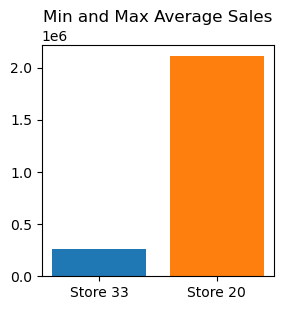

In [9]:
Avg_sales=pd.DataFrame(df.groupby('Store')['Weekly_Sales'].mean().sort_values())

print('_________________________________________________________________________________________________')
print(f'Store-{Avg_sales.index[0]} has minimum average sales ',Avg_sales.iloc[0][0])
print(f'Store-{Avg_sales.index[-1]} has maximum average sales ',Avg_sales.iloc[-1][0])
print('The difference between performance of best and worst performing store',(Avg_sales.iloc[-1][0]-Avg_sales.iloc[0][0]))
print('_________________________________________________________________________________________________')

plt.figure(figsize=(3,3))
plt.bar(x='Store '+str(Avg_sales.index[0]),height=Avg_sales.iloc[0][0])
plt.bar(x='Store '+str(Avg_sales.index[-1]),height=Avg_sales.iloc[-1][0])


plt.title('Min and Max Average Sales')
plt.show()

del Avg_sales

## 💠Top N best and worst performing stores

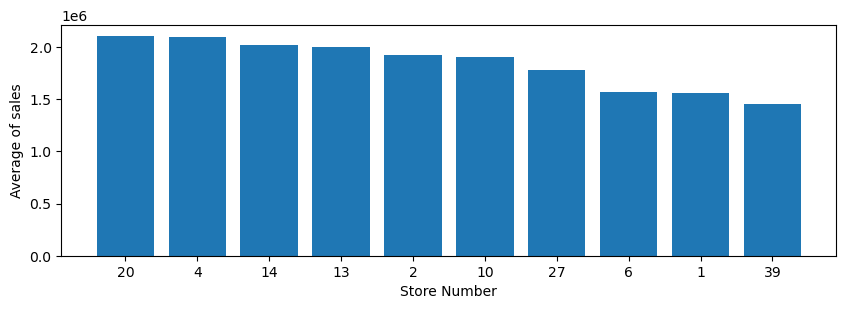

Store,20,4,14,13,2,10,27,6,1,39
Weekly_Sales,2.107677e+06,2.094713e+06,2.020978e+06,2.003620e+06,1.925751e+06,1.899425e+06,1.775216e+06,1.564728e+06,1.555264e+06,1.450668e+06


In [10]:
def top_N(n=10,bottom=False):
    Avg_sales=pd.DataFrame(df.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=bottom))
    Avg_sales=Avg_sales.iloc[:n]
    
    plt.figure(figsize=(10,3))
    plt.bar(x=[str(x) for x in Avg_sales.index],height=list(Avg_sales['Weekly_Sales']))
    plt.xlabel('Store Number')
    plt.ylabel('Average of sales')
    plt.show()
    return(Avg_sales.transpose())

top_N(10)

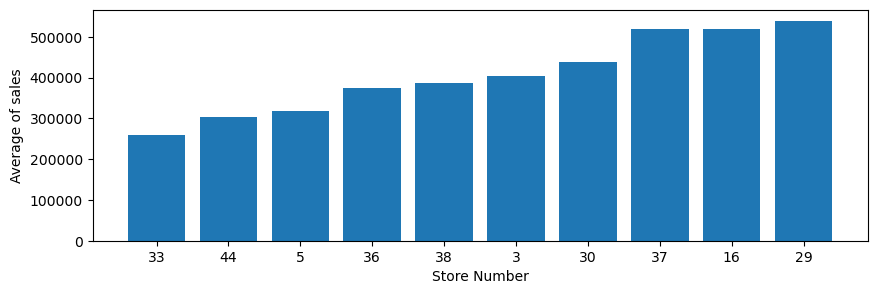

Store,33,44,5,36,38,3,30,37,16,29
Weekly_Sales,259861.692028,302748.866014,318011.81049,373511.992797,385731.653287,402704.441049,438579.616224,518900.281958,519247.73007,539451.428741


In [11]:
top_N(10,bottom=True)

 ## 💠Trend analysis of stores based on months 
 
 After analysing the store sales data using the function 'sales_trend_visual' it can be inferred that, graph shows
 a spike in the month of mid November to December as these are months of festive season.
 

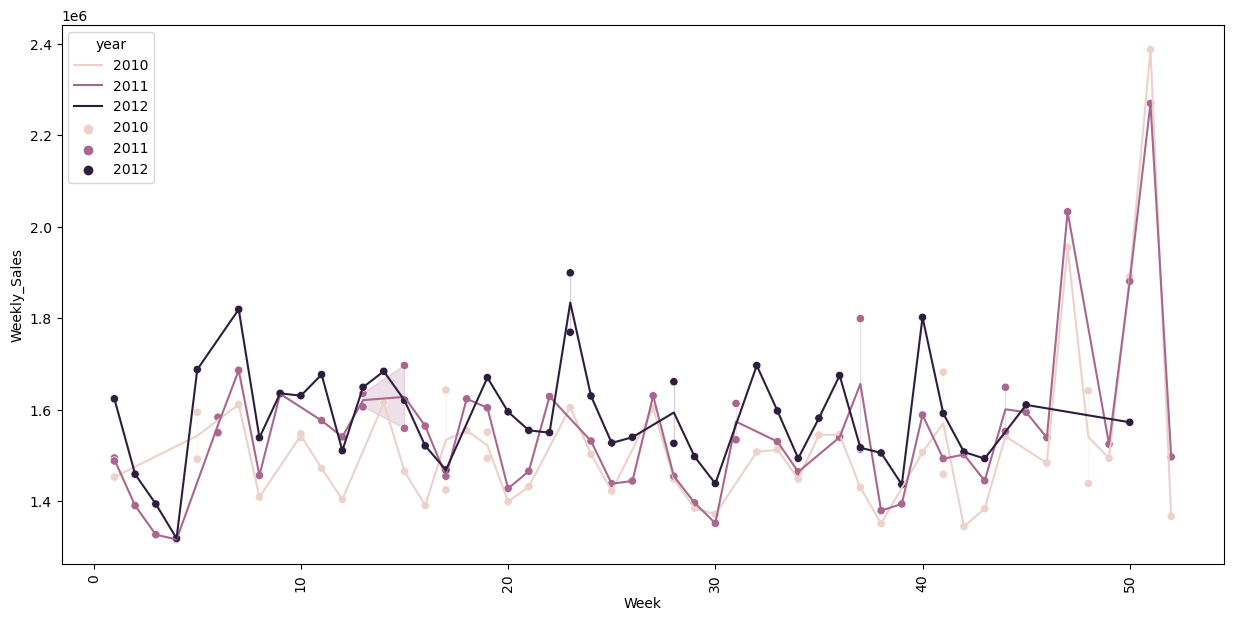

In [12]:
def sales_trend_visual(n):
    data=df[df['Store']==n]
    
    plt.figure(figsize=(15,7))
    sns.lineplot(data=data,x=data['Week'],y=data['Weekly_Sales'],hue=data['year']) 
    sns.scatterplot(data=data,x=data['Week'],y=data['Weekly_Sales'],hue=data['year'])
    
    plt.xticks(rotation=90)
    plt.show()
   
        
sales_trend_visual(1)

## 💠The effect of Unemployment on Weekly_Sales
The Unemployment rate shows weak inverse relation with sales

_______________________________________________________________________________________________________________________
***** The Unemployment shows weak inverse relation with sales *****
From the below mentioned plot it can be seen that store No[38,44] are affected the most inversly by the Unemployment
_______________________________________________________________________________________________________________________


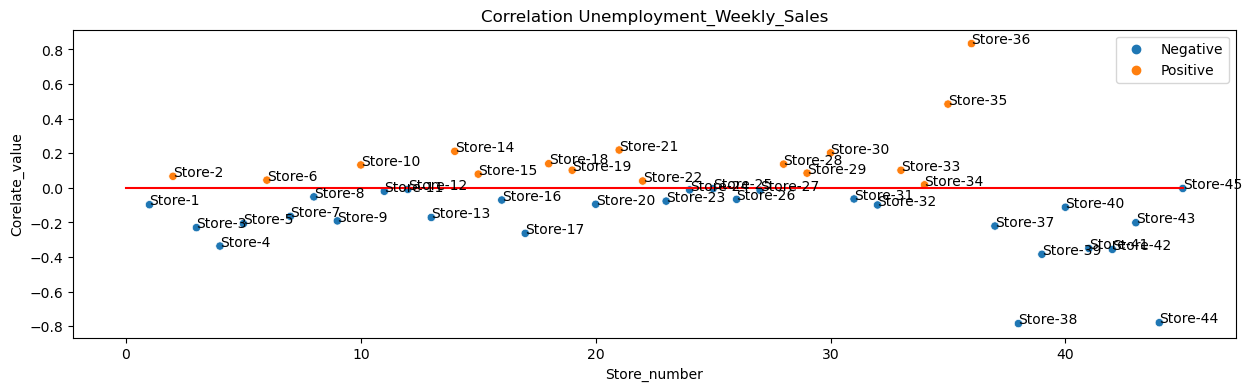

In [13]:
Corelate_value=[df[df['Store']==n][['Unemployment','Weekly_Sales']].corr().iloc[1,0] for n in range(1,46)]
Rel_type=['Positive'  if i>0   else 'Negative' for i in Corelate_value]
Store_number=[n for n in range(1,46)]
Store=['Store-'+str(i) for i in range(1,46)]

Unemployment_Weekly_Sales={'Corelate_value':Corelate_value,'Store_number':Store_number,'Rel_type':Rel_type}
Unemployment_Weekly_Sales=pd.DataFrame(Unemployment_Weekly_Sales).set_index('Store_number')

print('_______________________________________________________________________________________________________________________')
print('***** The Unemployment shows weak inverse relation with sales *****'  )
print('From the below mentioned plot it can be seen that store No[38,44] are affected the most inversly by the Unemployment')
print('_______________________________________________________________________________________________________________________')

plt.figure(figsize=(15,4))
plt.plot([0 for i in range(46) ],color='red')
sns.scatterplot(data=Unemployment_Weekly_Sales,x=Unemployment_Weekly_Sales.index,y=Unemployment_Weekly_Sales['Corelate_value'],
                hue=Rel_type)

plt.title('Correlation Unemployment_Weekly_Sales')
for i,t in enumerate(Store):
    plt.annotate(t,(Store_number[i],Corelate_value[i]))
plt.show()


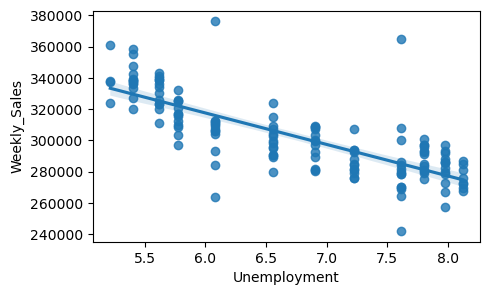

In [14]:
def reg_unemployment_Store(n):                                #This function is to check the plot for perticular store
    dt=df[df['Store']==n]
    plt.figure(figsize=(5,3))
    sns.regplot(x='Unemployment',y='Weekly_Sales',data=dt)
    plt.show()
 


reg_unemployment_Store(44)

## 💠Effect of Temperature on Weekly_sales

_______________________________________________________________________________________________________________________
As we can infer from the graph below the weekly sales has a very weak inverse relation with the temperature(-0.063810).
_______________________________________________________________________________________________________________________


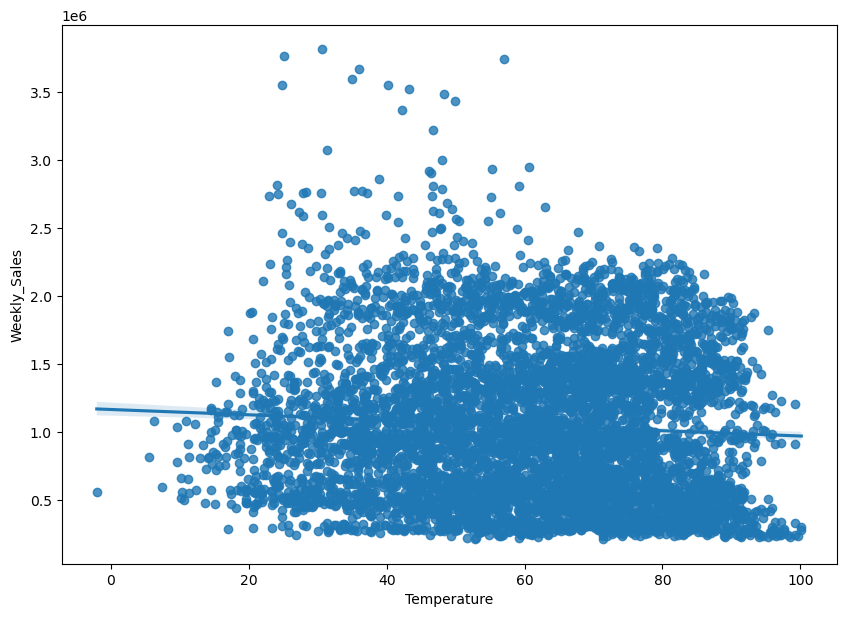

In [15]:
print('_______________________________________________________________________________________________________________________')
print('As we can infer from the graph below the weekly sales has a very weak inverse relation with the temperature(-0.063810).')
print('_______________________________________________________________________________________________________________________')

plt.figure(figsize=(10,7))
sns.regplot(x='Temperature',y='Weekly_Sales',data=df)
plt.show()

## 💠Effect of Consumer Price index affecting the weekly sales
The CPI rate shows weak inverse relation with sales

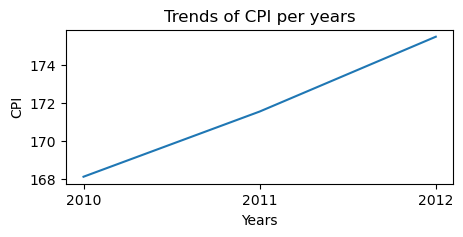

In [16]:
Year=df.groupby('year')['CPI'].mean()

plt.figure(figsize=(5,2))
plt.plot([str(x) for x in Year.index],Year)
plt.title('Trends of CPI per years')
plt.ylabel('CPI')
plt.xlabel('Years')
plt.show()

_______________________________________________________________________________________________________________________
***** The CPI shows weak inverse relation with sales *****
From the below mentioned plot it can be seen that store No[36] are affected the most inversly by the CPI
_______________________________________________________________________________________________________________________


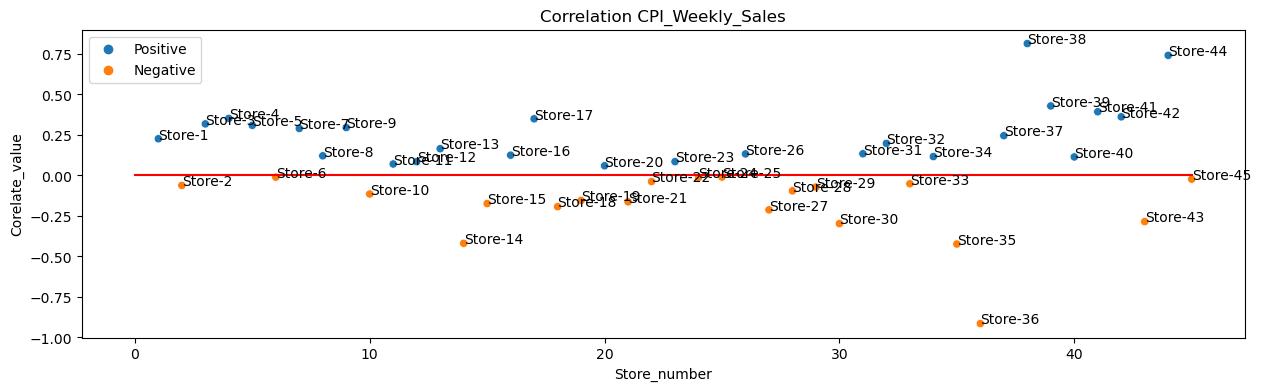

In [17]:
Corelate_value=[df[df['Store']==n][['CPI','Weekly_Sales']].corr().iloc[1,0] for n in range(1,46)]
Rel_type=['Positive'  if i>0   else 'Negative' for i in Corelate_value]
Store_number=[n for n in range(1,46)]
Store=['Store-'+str(i) for i in range(1,46)]

CPI_Weekly_Sales={'Corelate_value':Corelate_value,'Store_number':Store_number,'Rel_type':Rel_type}
CPI_Weekly_Sales=pd.DataFrame(CPI_Weekly_Sales).set_index('Store_number')

print('_______________________________________________________________________________________________________________________')
print('***** The CPI shows weak inverse relation with sales *****'  )
print('From the below mentioned plot it can be seen that store No[36] are affected the most inversly by the CPI')
print('_______________________________________________________________________________________________________________________')

plt.figure(figsize=(15,4))
plt.plot([0 for i in range(46) ],color='red')
sns.scatterplot(data=CPI_Weekly_Sales,x=CPI_Weekly_Sales.index,y=CPI_Weekly_Sales['Corelate_value'],
                hue=Rel_type)

plt.title('Correlation CPI_Weekly_Sales')
for i,t in enumerate(Store):
    plt.annotate(t,(Store_number[i],Corelate_value[i]))
plt.show()


## 💠Effect of Holiday_Flag on Weekly_Sales
From the plot it is clear that the sales is slightly hight on holidays which is about 7.83% more than sales on working days.
Which indicates Holiday_Flag has very weak positive relation with Weekly_Sales.
This sales occures in the late second half of year.

__________________________________________________________________________
From the plot it is clear that the sales is slightly hight on holidays
__________________________________________________________________________


[]

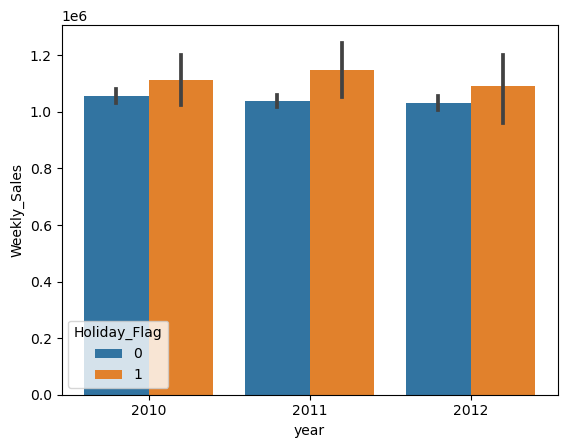

In [18]:
print('__________________________________________________________________________')
print('From the plot it is clear that the sales is slightly hight on holidays')
print('__________________________________________________________________________')

sns.barplot(data=df,x='year',y='Weekly_Sales',hue='Holiday_Flag')
plt.plot()

In [19]:
HS=df.groupby('Holiday_Flag')['Weekly_Sales'].mean()
print(HS)
percent=int((HS[1]-HS[0])/HS[0]*10000)/100

print('__________________________________________________________________________')
print(f'*** On an average the sales is {percent}% more on Holidays ***')

Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64
__________________________________________________________________________
*** On an average the sales is 7.83% more on Holidays ***


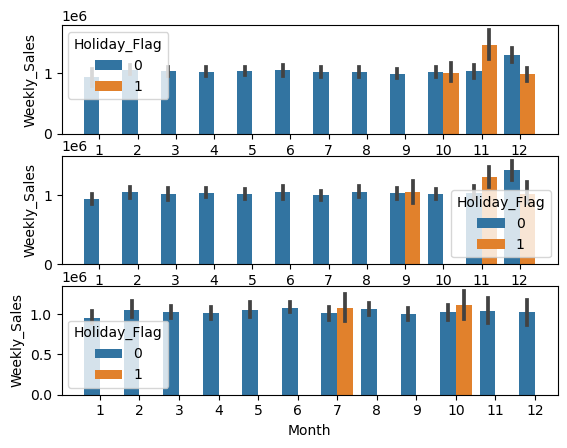

In [20]:
years=list(df['year'].unique())
for i,j in enumerate(years):
    dt=df[df['year']==j]
    plt.subplot(3,1,i+1)
    sns.barplot(data=dt,x='Month',y='Weekly_Sales',hue='Holiday_Flag')
    plt.plot()
       

## 💠Effect of  Fuel_Price on Weekly_Sales

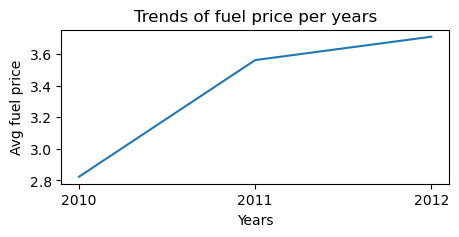

In [21]:
Year=df.groupby('year')['Fuel_Price'].mean()

plt.figure(figsize=(5,2))
plt.plot([str(x) for x in Year.index],Year)
plt.title('Trends of fuel price per years')
plt.ylabel('Avg fuel price')
plt.xlabel('Years')
plt.show()

In [22]:
co_rel=df[['Fuel_Price','Weekly_Sales']].corr().iloc[1,0]
print(f'There is no corelation between Fuel_Price and Weekly_Sales {co_rel} as the corelation factor is too small'  )

There is no corelation between Fuel_Price and Weekly_Sales 0.009463786314475482 as the corelation factor is too small


## [💠Choosing the Algorithm For the Project💠]
### <font color ='Grey'>🛒 Considering the complexity of the data and very low correlation between the Dependent and Independent variables, Random forest and XGboost can be more reliable than the traditional linear models.</font> 
### -----------------------------------------------------------------------------------------------------------------------------------------------------------

## 💠Model building & Prediction

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor 

In [24]:
df['Date'] = pd.to_datetime(df['Date'])
df=df.sort_values(by='Date')
df=df.set_index('Date')

df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,Month,Week
Date,,,,,,,,,,
2010-01-10,5,283178.12,0,71.10,2.603,212.226946,6.768,2010,1,1
2010-01-10,15,566945.95,0,59.69,2.840,132.756800,8.067,2010,1,1
2010-01-10,42,481523.93,0,86.01,3.001,126.234600,9.003,2010,1,1
2010-01-10,33,224294.39,0,91.45,3.001,126.234600,9.265,2010,1,1
2010-01-10,36,422169.47,0,74.66,2.567,210.440443,8.476,2010,1,1


 ## 💠Outlier treatment

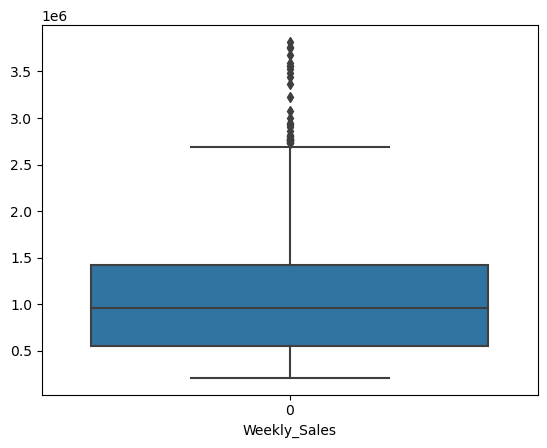

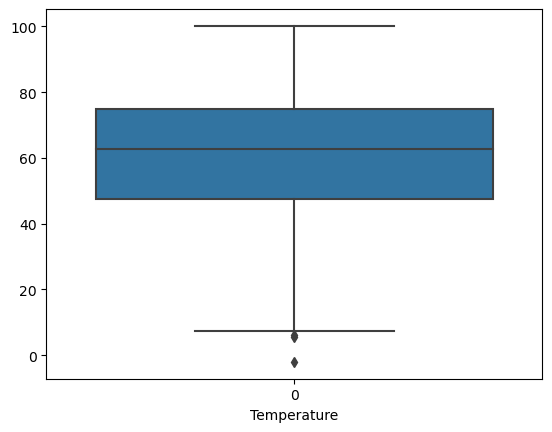

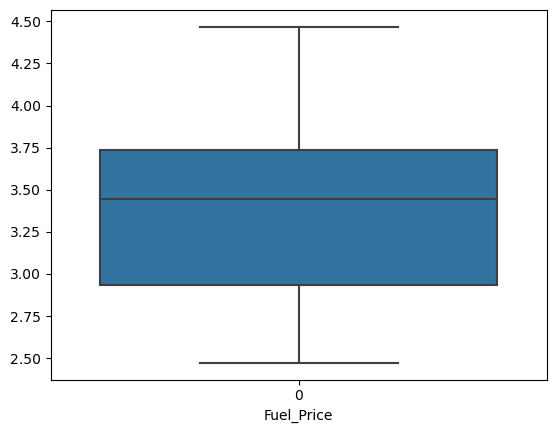

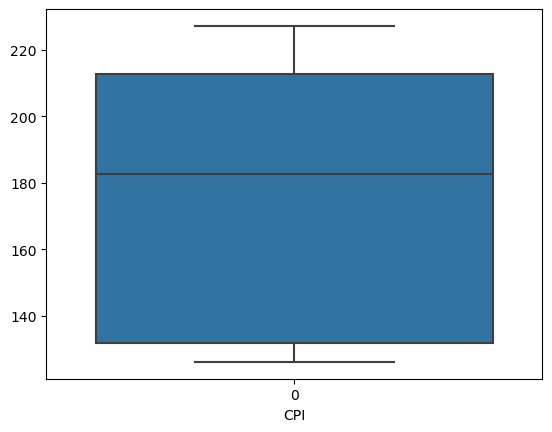

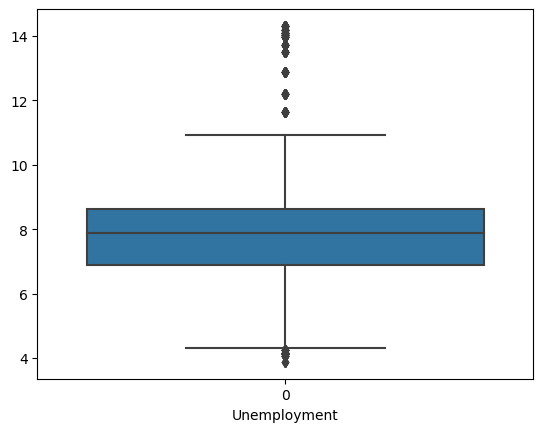

In [25]:
col=['Weekly_Sales','Temperature','Fuel_Price', 'CPI', 'Unemployment']

for i in col:
    sns.boxplot(df[i])
    plt.xlabel(i)
    plt.show()

In [26]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

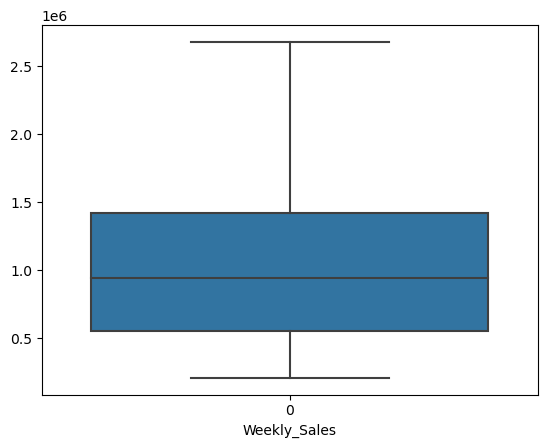

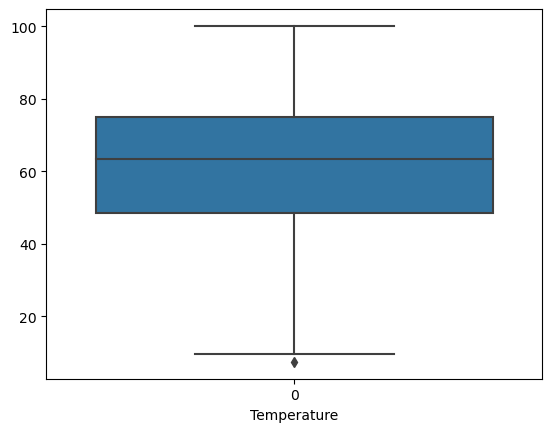

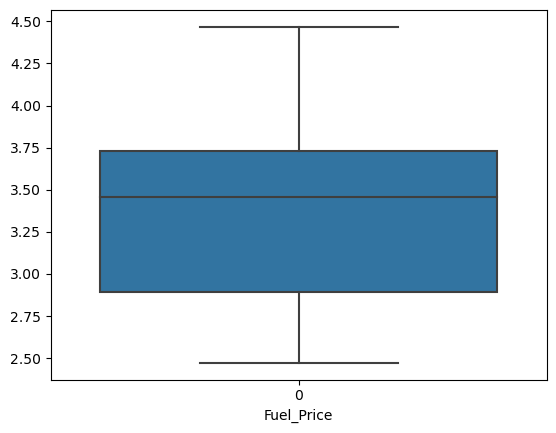

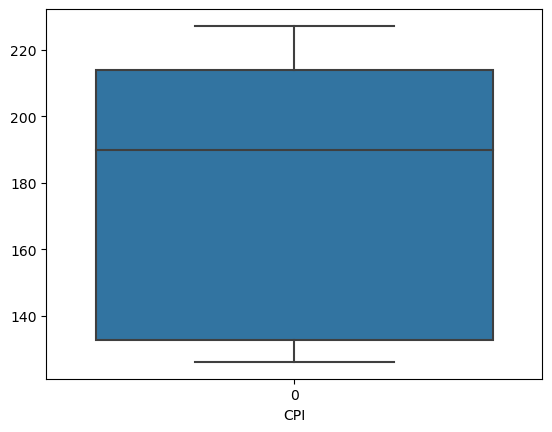

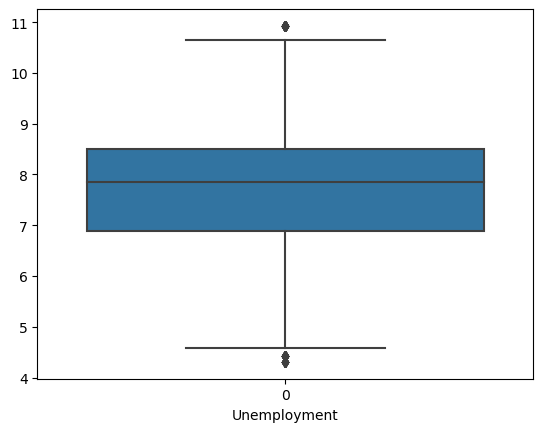

In [27]:
for i in col:
    sns.boxplot(df[i])
    plt.xlabel(i)
    plt.show()

In [28]:
df.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'year', 'Month', 'Week'],
      dtype='object')

<Axes: >

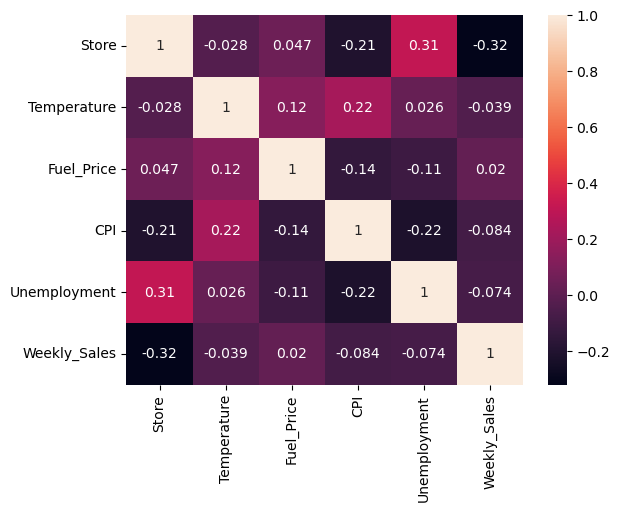

In [29]:
sns.heatmap(df[['Store', 'Temperature', 'Fuel_Price','CPI', 'Unemployment','Weekly_Sales']].corr(),annot=True)

## 💠RandomForestRegressor

In [30]:
X = df[['Store','Week','Month','year']][:4406]    
x = df[['Store','Week','Month','year']][4406:]    
Y = df['Weekly_Sales'][:4406]                                                   
y = df['Weekly_Sales'][4406:] 

In [31]:
regressor = RandomForestRegressor(n_estimators=1000,max_depth=10)
regressor.fit(X,Y)

RandomForestRegressor(max_depth=10, n_estimators=1000)

In [32]:
Y_pred = regressor.predict(x)

print('r2 score of Randomforest : ',r2_score(y,Y_pred))
print('mean_absolute_error of Randomforest : ',mean_absolute_error(y,Y_pred))

r2 score of Randomforest :  0.9476013468101423
mean_absolute_error of Randomforest :  74728.2507054864


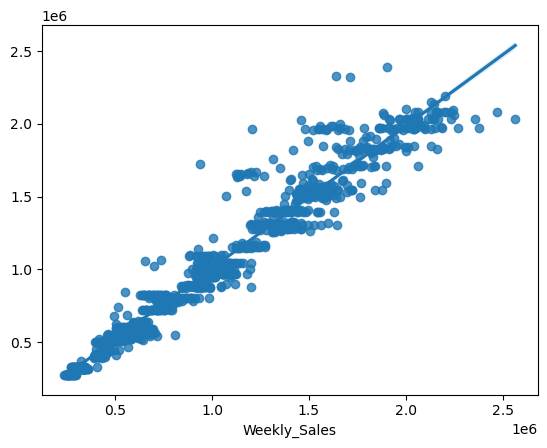

In [33]:
sns.regplot(x=y,y=Y_pred)
plt.show()

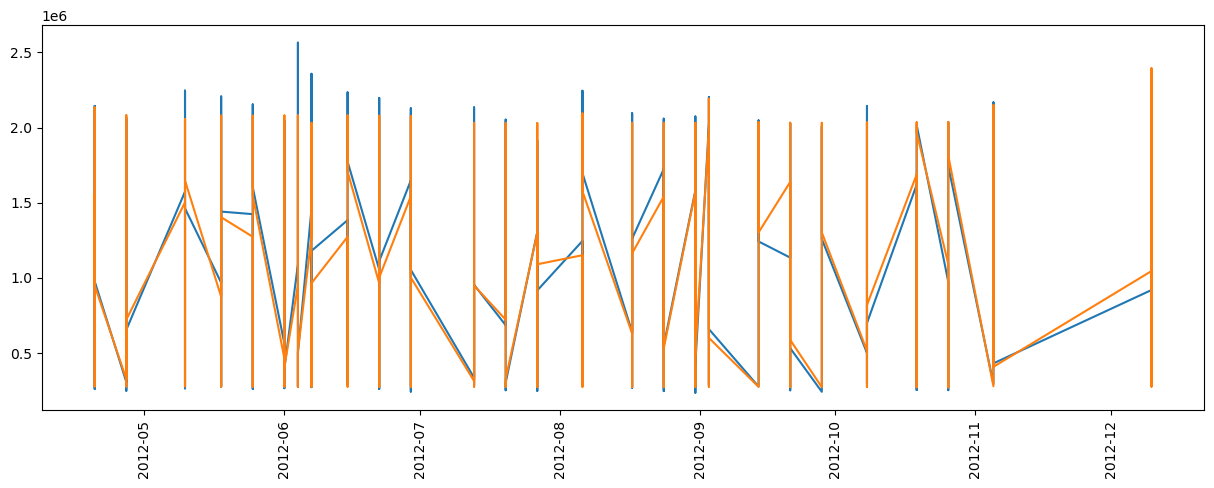

In [34]:
y=pd.DataFrame(y)
predict=list(Y_pred)

y['Predict']=predict

plt.figure(figsize=(15,5))
plt.plot(df['Weekly_Sales'][4406:])
plt.plot(y['Predict'])
plt.xticks(rotation=90)
plt.show()

## 💠XGBRegressor

In [35]:
X = df[['Store','Week','Month','year']][:4406]    
x = df[['Store','Week','Month','year']][4406:]    
Y = df['Weekly_Sales'][:4406]                                                   
y = df['Weekly_Sales'][4406:] 

In [36]:
Model_xgb=XGBRegressor(n_estimators=1000,max_depth=10)
Model_xgb.fit(X,Y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [37]:
y_pred=Model_xgb.predict(x)
print("r2 score of XGBoost: ",r2_score(y,y_pred))
print("mean_absolute_error of XGBoost: ",mean_absolute_error(y,y_pred))

r2 score of XGBoost:  0.942767628806841
mean_absolute_error of XGBoost:  81709.9449506579


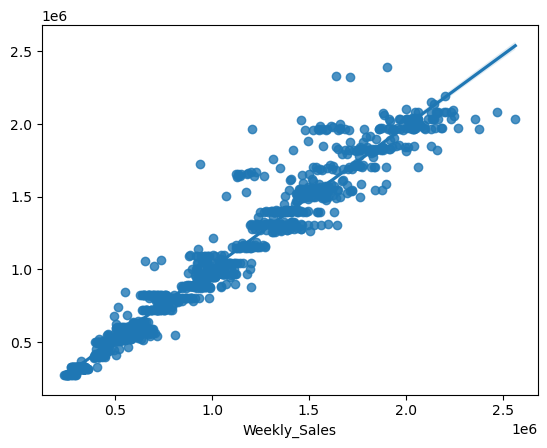

In [38]:
sns.regplot(x=y,y=Y_pred)
plt.show()

## [💠Model Evaluation and Techniques💠]

### <font color ='Grey'>🛒I have chosen two Model Evaluation Techniques </font> 
    ▶r2_score
    ▶mean_absolute_error

### -----------------------------------------------------------------------------------------------------------------------------------------------------------

In [39]:
Model_Evaluation={'MODEL':['RandomForestRegressor','XGBRegressor'],
                  'r2_score':[0.94,0.94],'mean_absolute_error':[74826.78,81709.94]}
pd.DataFrame(Model_Evaluation)

,MODEL,r2_score,mean_absolute_error
0,RandomForestRegressor,0.94,74826.78
1,XGBRegressor,0.94,81709.94


## [💠Predictions of 12 weeks of each store: Using RandomForest💠]
  

In [40]:
import calendar
import datetime

def Sales_predict_per_store(Store_num,year,M=[]):
    
    DF={'Store':[],'Week':[],'Month':[],'year':[]}
    for i in M:
        for j in range(len(calendar.monthcalendar(year,i))-1):
            DF['Store'].append(Store_num)
            DF['Month'].append(i)
            DF['year'].append(year)
        for k in range(len(calendar.monthcalendar(year,i))-1):
            day=calendar.monthcalendar(year,i)[k][-1]
            DF['Week'].append(datetime.date(year,i,day).isocalendar()[1])
                       
    DF=pd.DataFrame(DF)
    
    Sales_predict=regressor.predict(DF)
    DF['Sales_predict']=Sales_predict
    print(DF)
      
    plt.plot(DF["Week"],DF['Sales_predict'])
    plt.xlabel('WEEK Number')
    plt.ylabel('Predicted sales')
    plt.show()
    

    Store  Week  Month  year  Sales_predict
0      18     1      1  2013   1.034835e+06
1      18     2      1  2013   1.034737e+06
2      18     3      1  2013   1.034585e+06
3      18     4      1  2013   1.034585e+06
4      18     5      2  2013   1.039189e+06
5      18     6      2  2013   1.039088e+06
6      18     7      2  2013   1.043803e+06
7      18     8      2  2013   1.043918e+06
8      18     9      3  2013   1.044019e+06
9      18    10      3  2013   1.044019e+06
10     18    11      3  2013   1.044019e+06
11     18    12      3  2013   1.044019e+06


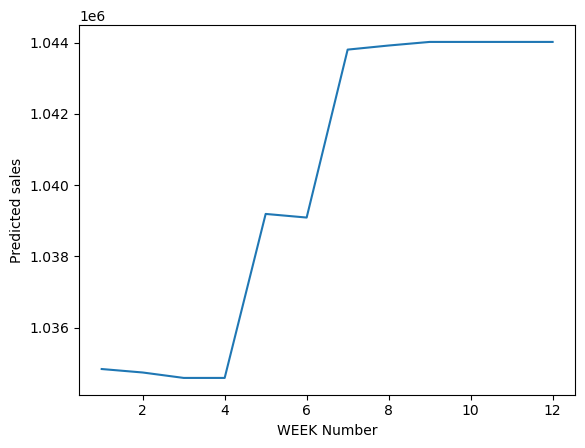

In [41]:
Sales_predict_per_store(18,2013,[1,2,3])

In [42]:
def Sales_predict(Store_num,year,M=[]):
    
    DF={'Store':[],'Week':[],'Month':[],'year':[]}
    for i in M:
        for j in range(len(calendar.monthcalendar(year,i))-1):
            DF['Store'].append(Store_num)
            DF['Month'].append(i)
            DF['year'].append(year)
        for k in range(len(calendar.monthcalendar(year,i))-1):
            day=calendar.monthcalendar(year,i)[k][-1]
            DF['Week'].append(datetime.date(year,i,day).isocalendar()[1])
                       
    DF=pd.DataFrame(DF)
    
    Sales_predict=regressor.predict(DF)
    DF['Sales_predict']=Sales_predict
    return(DF['Sales_predict'])


Prediction_values={'Week':[1,2,3,4,5,6,7,8,9,10,11,12]}
for i in range(1,max(df['Store'])+1):
    
    Prediction_values[f'Store- {i}']=list(Sales_predict(i,2013,[1,2,3]).values)


Prediction_values=pd.DataFrame(Prediction_values).set_index('Week')
Prediction_values

,Store- 1,Store- 2,Store- 3,Store- 4,Store- 5,Store- 6,Store- 7,Store- 8,Store- 9,Store- 10,...,Store- 36,Store- 37,Store- 38,Store- 39,Store- 40,Store- 41,Store- 42,Store- 43,Store- 44,Store- 45
Week,,,,,,,,,,,,,,,,,,,,,
1,1.568031e+06,1.875882e+06,407549.284629,2.103027e+06,328654.434512,1.527642e+06,558801.851952,879706.729353,534135.563228,1.764199e+06,...,315117.421476,530073.552105,503041.373055,1.538207e+06,9.151015e+05,1.297286e+06,556214.858913,621818.874932,319567.144216,795919.844999
2,1.472367e+06,1.764209e+06,384503.434224,1.989765e+06,307319.834566,1.382872e+06,557002.942224,870959.011397,522719.266805,1.717089e+06,...,319828.874189,531165.954391,503899.723544,1.421398e+06,8.318134e+05,1.151067e+06,616865.971651,631190.140678,316009.015442,694198.410564
3,1.401833e+06,1.727138e+06,367647.267666,1.979909e+06,299052.123970,1.368756e+06,556823.367445,869748.530702,520805.512592,1.692082e+06,...,322428.253833,530960.676152,503763.807156,1.382575e+06,8.000010e+05,1.126322e+06,585282.488652,625040.532787,315132.266348,685025.723807
4,1.362995e+06,1.685974e+06,362536.833121,1.952080e+06,300772.700063,1.369444e+06,556789.569513,867097.247947,521734.689176,1.684026e+06,...,313800.849035,526655.693570,500452.954004,1.359476e+06,8.144008e+05,1.119176e+06,569801.238600,608593.921252,313092.203547,647177.195291
5,1.661221e+06,1.930034e+06,446402.394627,2.169977e+06,336695.270566,1.581575e+06,557019.452396,896879.731382,552207.566790,1.966163e+06,...,316303.753959,526938.046677,500549.301201,1.442776e+06,1.012719e+06,1.231692e+06,575539.194936,647644.345389,316265.297137,796867.117571
6,1.683178e+06,1.937659e+06,454651.894611,2.210481e+06,340580.918317,1.571747e+06,557220.348282,901775.227464,555441.218306,1.972075e+06,...,316809.600940,527076.404003,500679.532649,1.468489e+06,9.915199e+05,1.246474e+06,576231.182878,637056.338446,316923.194916,801817.910402
7,1.741728e+06,2.116719e+06,453916.672334,2.321941e+06,338714.334621,1.563722e+06,557456.007648,905091.230435,556739.503808,2.013236e+06,...,317441.594180,527872.338872,501042.647793,1.457964e+06,9.518511e+05,1.245016e+06,579416.175170,637604.139764,317986.898319,820962.846838
8,1.610547e+06,1.910948e+06,427442.711335,2.210392e+06,330661.188004,1.562175e+06,557456.007648,893574.098166,547442.803058,1.993531e+06,...,315577.472965,523682.507652,496361.901966,1.442889e+06,9.432412e+05,1.237885e+06,577450.160680,630007.223444,317922.551317,762951.392963
9,1.621618e+06,1.922526e+06,419202.374724,2.163785e+06,329951.451373,1.564459e+06,557456.007648,892201.915103,545515.242600,1.916398e+06,...,314366.159585,525915.926801,498181.892865,1.460515e+06,9.522038e+05,1.248073e+06,578153.456368,628808.271965,326465.927410,779954.314547


## [💠Predictions of 12 weeks of each store: Using SARIMAX💠]

In [43]:
df.head()                                #This data is pre-processed in above steps for outliers

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,Month,Week
Date,,,,,,,,,,
2010-01-10,5,283178.12,0,71.10,2.603,212.226946,6.768,2010,1,1
2010-01-10,15,566945.95,0,59.69,2.840,132.756800,8.067,2010,1,1
2010-01-10,42,481523.93,0,86.01,3.001,126.234600,9.003,2010,1,1
2010-01-10,33,224294.39,0,91.45,3.001,126.234600,9.265,2010,1,1
2010-01-10,36,422169.47,0,74.66,2.567,210.440443,8.476,2010,1,1


## 💠Testing and analysing data for parameters of SARIMAX time-series 

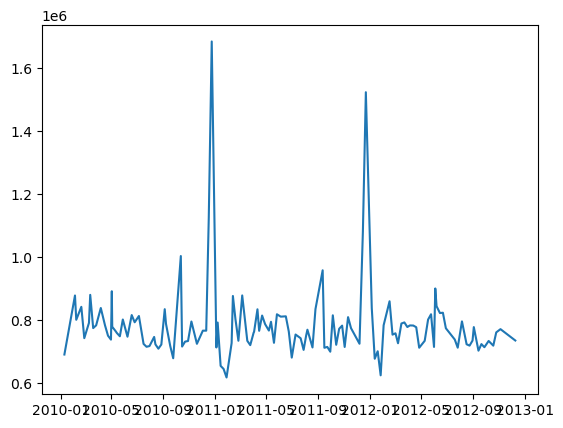

In [44]:
Store=df[df['Store']==45]['Weekly_Sales']
plt.plot(Store)
plt.show()

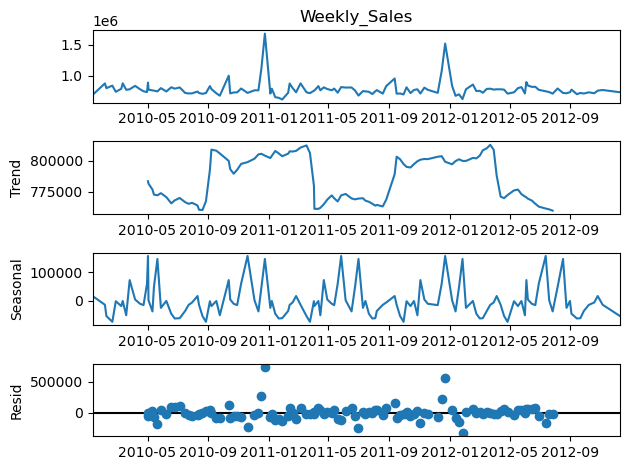

In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(Store,period=26)
result.plot()
plt.show()

In [46]:
from statsmodels.tsa.stattools import adfuller

result=adfuller(Store)
print('Stationary series' if result[1]<0.05 else 'Non-Stationary series')

train=Store[:len(Store)-12]
test=Store[len(Store)-12:]

Stationary series


C:\Users\MAYUR\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


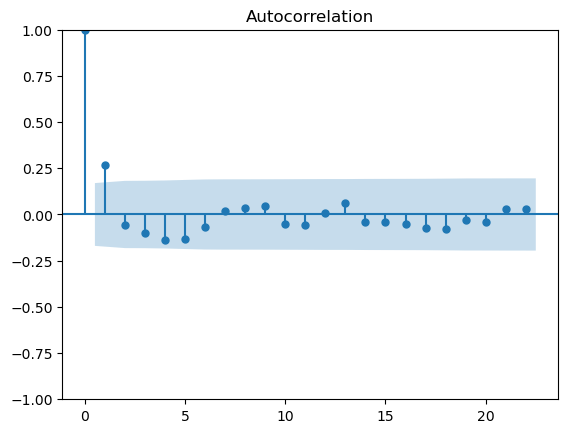

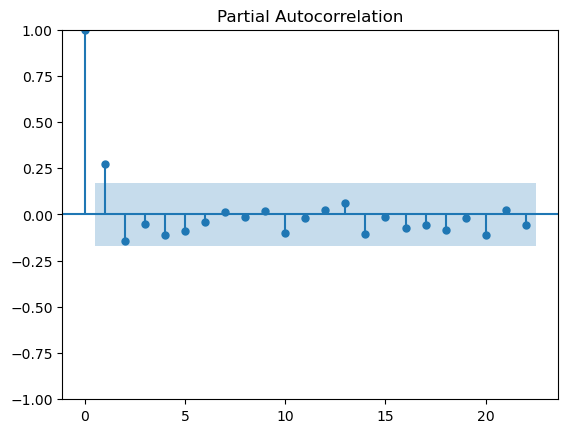

In [47]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plot_acf(Store)

plot_pacf(Store)

plt.show()

C:\Users\MAYUR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\MAYUR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\MAYUR\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\MAYUR\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `st

Mean_absolute_error  46535.57878264931
Root_Mean_absolute_error  67172.50462638694


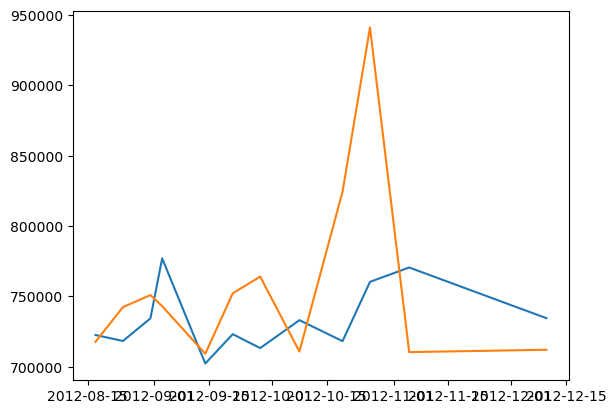

In [48]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error,mean_squared_error

model = sm.tsa.SARIMAX(train, order=(1,0,1), seasonal_order=(1,1,1,52))
results = model.fit()

forecast = results.get_forecast(steps=12) 
forecast_mean = forecast.predicted_mean
forecast_mean=pd.DataFrame(forecast_mean).set_index(test.index)


print('Mean_absolute_error ',mean_absolute_error(test,forecast_mean))
print('Root_Mean_absolute_error ',np.sqrt(mean_squared_error(test,forecast_mean)))
plt.plot(test)
plt.plot(forecast_mean)
plt.show()

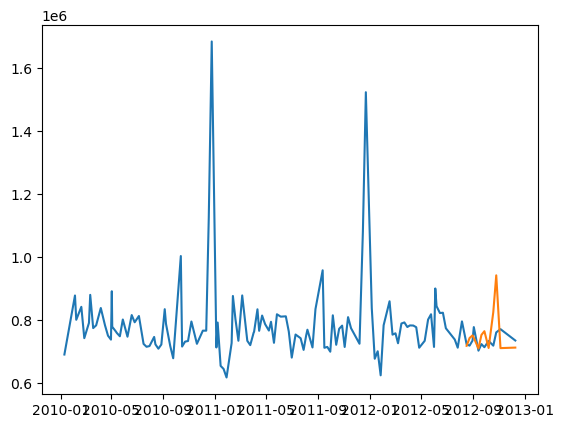

In [49]:
plt.plot(Store)
plt.plot(forecast_mean)
plt.show()

## 💠Predicting sales for 12 weeks for all the stores

In [50]:
import warnings
warnings.filterwarnings('ignore')

SARIMAX_pred={'Week':[x for x in range(1,13)]}

for i in range(1,max(df['Store'].unique())):   
    S=df[df['Store']==i]['Weekly_Sales']
    model = sm.tsa.SARIMAX(S, order=(1,0,1), seasonal_order=(1,1,1,52))
    results = model.fit()
    forecast = results.get_forecast(steps=12) 
    forecast_mean = forecast.predicted_mean
    SARIMAX_pred['Store'+str(i)]=list(forecast_mean)
    
SARIMAX_pred

{'Week': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 'Store1': [1412760.9981626882,
  1614331.0228198054,
  1515918.4445315055,
  1525662.519328615,
  1467279.477189733,
  1576903.474230957,
  1619307.6890464788,
  1563025.0626175066,
  1548457.1402390092,
  1909957.7653290508,
  2304985.894145947,
  1649312.6793549284],
 'Store2': [1727498.8037285097,
  1705073.6091885425,
  1964951.7010873626,
  1793002.3731032955,
  1875382.4155128142,
  1807299.727947292,
  1908185.7651972985,
  1988914.5308495988,
  1935210.0738937475,
  1845458.406211427,
  2443535.4742853767,
  1956670.4132947768],
 'Store3': [364296.12473064865,
  407267.9493884535,
  376708.98884724797,
  406398.13054100383,
  400040.7158816751,
  415889.8302854312,
  418951.7577062177,
  409806.3637631886,
  390819.41281480895,
  524826.173904399,
  566419.2009155342,
  444144.2186544013],
 'Store4': [2107244.8977683056,
  2122591.2946019755,
  2092587.0559021954,
  2175039.6236090837,
  2251062.534858585,
  2112098.1372079803,

### Note : There is very insufficient data for Store-38

In [53]:
SARIMAX_pred=pd.DataFrame(SARIMAX_pred).set_index(SARIMAX_pred['Week'])
SARIMAX_pred.head()

,Week,Store1,Store2,Store3,Store4,Store5,Store6,Store7,Store8,Store9,...,Store35,Store36,Store37,Store38,Store39,Store40,Store41,Store42,Store43,Store44
Week,,,,,,,,,,,,,,,,,,,,,
1,1,1.412761e+06,1.727499e+06,364296.124731,2.107245e+06,296548.800425,1.330226e+06,496158.707285,841125.656098,516633.175407,...,7.800729e+05,266165.890814,518621.689789,0.0,1.397137e+06,9.233789e+05,1.276959e+06,526024.715151,568390.887917,331566.054250
2,2,1.614331e+06,1.705074e+06,407267.949388,2.122591e+06,314271.815323,1.606275e+06,479346.953047,910872.887598,567192.202653,...,9.974042e+05,313117.363493,511852.874953,0.0,1.515077e+06,9.605756e+05,1.372404e+06,635230.348574,572048.347760,341646.810297
3,3,1.515918e+06,1.964952e+06,376708.988847,2.092587e+06,293495.668274,1.408614e+06,418459.414078,877772.535071,544505.978746,...,1.038324e+06,291323.169328,516177.134494,0.0,1.453342e+06,1.210664e+06,1.304203e+06,632221.234558,578937.241841,324046.989462
4,4,1.525663e+06,1.793002e+06,406398.130541,2.175040e+06,314408.814140,1.439961e+06,501065.377120,918938.077690,573200.857836,...,7.182405e+05,279727.651900,525579.467177,0.0,1.537891e+06,1.693059e+06,1.262323e+06,552553.887674,569229.907839,338473.953640
5,5,1.467279e+06,1.875382e+06,400040.715882,2.251063e+06,315274.429091,1.426961e+06,419152.140317,888012.036963,564348.594256,...,6.622001e+05,259821.544182,520175.539253,0.0,1.545673e+06,8.644728e+05,1.317222e+06,530915.496415,509239.064022,338857.112557


133    6.717618e+05
134    8.097461e+05
135    7.112587e+05
136    7.579282e+05
137    7.638963e+05
138    7.191444e+05
139    7.912565e+05
140    7.595992e+05
141    7.137143e+05
142    1.047051e+06
143    1.455273e+06
144    8.205898e+05
Name: predicted_mean, dtype: float64


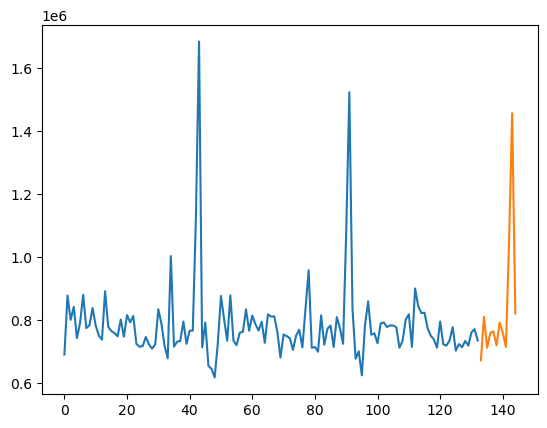

In [56]:
def Prediction_visual(Store_no):
        S=df[df['Store']==Store_no]['Weekly_Sales']
        model = sm.tsa.SARIMAX(S, order=(1,0,1), seasonal_order=(1,1,1,52))
        results = model.fit()
        forecast = results.get_forecast(steps=12) 
        forecast_mean = forecast.predicted_mean
        print(forecast_mean)
        plt.plot(list(S))
        plt.plot(forecast_mean)
        plt.show()
        
Prediction_visual(45)

## [💠Inferences from Analysis💠]
▶Top 10 best performing stores: [Store	20,	4,	14,	13,	2,	10,	27,	6,	1,	39]

▶Top 10 worst performing stores: [Store	33,	44,	5,	36,	38,	3,	30,	37,	16,	29]

▶Store-33 has minimum average sales  259861.69202797202,
  Store-20 has maximum average sales  2107676.8703496503
  
  The difference between performance of best and worst performing store 1847815.17832167

▶After analysing the store sales data using the function 'sales_trend_visual' it can be inferred that, graph shows
  a spike in the month of mid November to December as these are months of festive season.

▶From the above analysis it can be seen that store No[38,44] are affected the most inversly by the Unemployment

▶As we can infer from the above analysis the weekly sales has a very weak inverse relation with the temperature(-0.063810).

▶From the analysis it is clear that the sales is slightly hight on holidays which is about 7.83% more than sales on working       days. Which indicates Holiday_Flag has very weak positive relation with Weekly_Sales. This sales occures in the late second     half of year.

▶The fuel price does not affects the weekly sales 

### -----------------------------------------------------------------------------------------------------------------------------------------------------------

## [💠Future Possibilities of the Project💠]

▶Intigrating more features based on location of store, population density, standard of living of population can increase the accuracy of the model which ultimately leads to increment in sales.

▶Informative features about promotional campaign,nearby competative stores, discount sales can be helpful for improving performance of stores with less than average sales.

▶Although Randomforest,XGBoost gives satisfactory results, more efficient techniques such as Timeseries, Neural Networks along with the improved features will give more effective insights for the development and growth of indiviual store.

### -----------------------------------------------------------------------------------------------------------------------------------------------------------

## [💠 Conclusion💠]

### <font color ='red'>▶After analysing the given sales data it can be seen that sales of walmart is decreasing and majority of the stores are performing below average, an in depth analysis is required for identification the causes.   </font>
### -----------------------------------------------------------------------------------------------------------------------------------------------------------

## [💠 References💠]

▶Matplotlib. (2024). Matplotlib Documentation.
['https://matplotlib.org/stable/api/pyplot_summary.html]

▶Scikit-learn Documentation.(2024). Random Forests 
['https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html]

▶kaggle. XGBoost : XGBRegressor
['https://www.kaggle.com/code/dansbecker/xgboost']

▶geeksforgeeks: SARIMAX :Complete Guide To SARIMAX in Python
https://www.geeksforgeeks.org/complete-guide-to-sarimax-in-python/

### -----------------------------------------------------------------------------------------------------------------------------------------------------------